In [3]:
#Obtención de la información (Datos Demográficos de Superdatascience.com)
#Paquetes para análisis estadístico
import pandas as pd
import numpy as np
import scipy.stats
import math
#import statistics
import scipy.stats
from scipy.stats import chi2_contingency

filename = 'https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P4-Demographic-Data.csv'
data = pd.read_csv(filename, header=0)

data.head(10) #Ver las 10 primeras filas

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9000,High income
1,Afghanistan,AFG,35.253,5.9000,Low income
2,Angola,AGO,45.985,19.1000,Upper middle income
3,Albania,ALB,12.877,57.2000,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0000,High income
5,Argentina,ARG,17.716,59.9000,High income
6,Armenia,ARM,13.308,41.9000,Lower middle income
7,Antigua and Barbuda,ATG,16.447,63.4000,High income
8,Australia,AUS,13.200,83.0000,High income
9,Austria,AUT,9.400,80.6188,High income


In [7]:
#Creacion de una variables discretizada a partir de Birth Rate y de Internet Users
data['Birth rate Bin']=pd.qcut(data["Birth rate"],q=4)
data['Internet users Bin']=pd.qcut(data["Internet users"],q=4)

In [8]:
#Creación de una tabla cruzada o de contingencia de las variables Birth rate Bin e Income Group
ct=pd.crosstab(data['Birth rate Bin'],data['Income Group'])

In [9]:
#Realización de la prueba Chi - cuadrado
chi_test=chi2_contingency(ct)
chi_test

(152.23541976025484,
 3.0354098950967886e-28,
 9,
 array([[16.83589744,  7.53846154, 12.56410256, 12.06153846],
        [16.83589744,  7.53846154, 12.56410256, 12.06153846],
        [16.49230769,  7.38461538, 12.30769231, 11.81538462],
        [16.83589744,  7.53846154, 12.56410256, 12.06153846]]))

In [ ]:
# Ejercicio: realizar la interpretación de la tabla cruzada tabla cruzada o de contingencia 
# de las variables Birth rate Bin e Income Group

In [10]:
#Cálculo de coficiente de corelación de Pearson
r, p = scipy.stats.pearsonr(data['Internet users Bin'], data['Internet users'])

In [11]:
r #valor de la correlacion

-0.8155885551284765

In [12]:
p #p-valor

9.766206312069597e-48

In [13]:
# Matriz de correlaciones En numpy
corr_matrix = np.corrcoef(data['Birth rate'], data['Internet users'])
corr_matrix

array([[ 1.        , -0.81558856],
       [-0.81558856,  1.        ]])

In [14]:
# Matriz de correlacion en pandas
# de todas las variables numréicas
data.corr()

,Birth rate,Internet users
Birth rate,1.000000,-0.815589
Internet users,-0.815589,1.000000


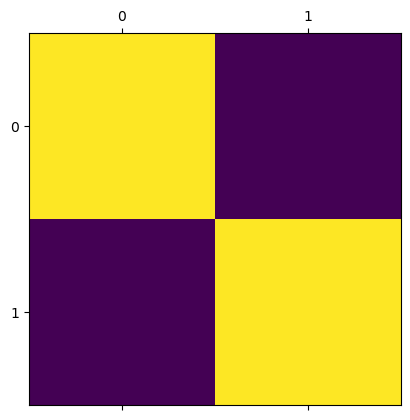

In [15]:
# Bonus mapa de calor correlaciones
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()